# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 1. Метрики и меры схожести.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Смена рабочей директории.

In [ ]:
import os
os.chdir('/content/drive/MyDrive/2025-Kovalev-TimeSeriesCourse/practice/01 Basics')

Использование команд, которые автоматически перезагружают все импортированные модули при их изменении.

In [1]:
%load_ext autoreload
%autoreload 2

## **Часть 1.** Евклидова метрика и DTW мера. Матрица расстояний. Иерархическая кластеризация.

Импорт библиотек и модулей.

In [2]:
import numpy as np
import pandas as pd

from modules.metrics import *
from modules.utils import *
from modules.plots import *

### **Задача 1.**
Вам необходимо самостоятельно реализовать функцию `ED_distance()` в модуле *metrics.py* для нахождения евклидовой метрики между временными рядами, имеющими одинаковую длину, и проверить ее реализацию с помощью функции `euclidean_distance()` из библиотеки *sktime*. В качестве входных данных используйте два синтетических временных ряда некоторой заданной вами длины, сгенерированных моделью случайных блужданий (Random Walk). Модель случайных блужданий реализуйте самостоятельно или используйте готовые реализации.

*Евклидова метрика* между временными рядами $T_1$ и $T_2$ длины $n$ вычисляется следующим образом:

\begin{equation}
    \text{ED}(T_1, T_2) = \sqrt{\sum_{i=1}^{n} ({t_{1}}_i-{t_{2}}_i)^2}.
\end{equation}

In [3]:
!pip install sktime


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Home\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
from sktime.distances import euclidean_distance

def test_ed_distance(ts1, ts2):

    sktime_ed_dist = round(euclidean_distance(ts1, ts2), 5)
    desired_ed_dist = round(ED_distance(ts1, ts2), 5)
    if sktime_ed_dist==desired_ed_dist:
      print (f'sktime = desired ={sktime_ed_dist}' )
    np.testing.assert_equal(sktime_ed_dist, desired_ed_dist, 'ED distances are not equal')

In [5]:
import random

ts1 = np.array([random.random() for i in range(3)])
ts2 = np.array([random.random() for i in range(3)])

In [6]:
ts1

array([0.05479869, 0.80747164, 0.62710245])

In [7]:
ts2

array([0.39678652, 0.98469326, 0.79978382])

In [8]:
test_ed_distance(ts1, ts2)

sktime = desired =0.42212


### **Задача 2.**

Вам необходимо самостоятельно реализовать функцию `DTW_distance()` в модуле *metrics.py* для нахождения DTW меры между временными рядами, имеющими одинаковую длину, и проверить ее реализацию с помощью функции `dtw_distance()` из библиотеки *sktime*. Сгенерируйте два временных ряда некоторой заданной вами длины с помощью модели случайных блужданий (Random Walk) или используйте ряды из предыдущей задачи.

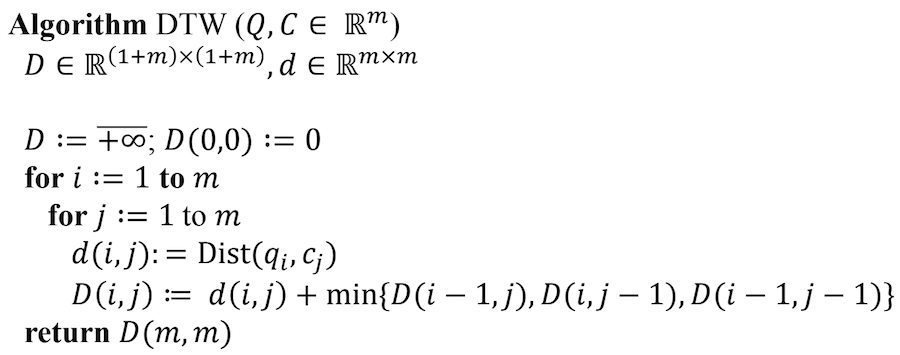

In [9]:
import random
from sktime.distances import dtw_distance

def test_dtw_distance(ts1, ts2):

    sktime_dtw_dist = dtw_distance(ts1, ts2)
    desired_dtw_dist = DTW_distance(ts1, ts2)

    np.testing.assert_equal(sktime_dtw_dist, desired_dtw_dist, 'DTW distances are not equal')

In [10]:
DTW_distance(ts1, ts2)

np.float64(0.17818203853987763)

In [11]:
dtw_distance(ts1, ts2)

0.17818203853987763

In [12]:
test_dtw_distance(ts1, ts2)

### **Задача 3.**
Реализуйте функцию нахождения матрицы расстояния между временными рядами. Для вычисления расстояний между рядами используйте реализованные вами функции `ED_distance()` и `DTW_distance()` из модуля *metrics.py*.

Поскольку евклидова метрика и DTW мера удовлетворяют аксиоме симметричности (т.е. $dist(A,B)=dist(B,A)$), то матрица расстояний будет квадратной и симметричной относительно главной диагонали. Для ускорения вычислений достаточно найти ее верхний треугольник, а нижний треугольник матрицы заполнить значениями верхнего треугольника следующим образом: $dist\_matrix(j,i) = dist\_matrix(i,j)$, где $i < j$.

In [13]:
a = np.random.randint(100, size=(5,5))
a

array([[47, 72,  0, 76, 77],
       [38, 45, 23, 46, 11],
       [94, 90, 21, 82, 20],
       [72, 29,  4, 69, 12],
       [51,  3, 49,  2, 73]], dtype=int32)

In [14]:
from scipy.spatial.distance import cdist

In [15]:
def calculate_distance_matrix(data, metric='euclidean', normalize=True):

    n = data.shape[0]  # Количество временных рядов

    if metric == 'euclidean':
      distance_matrix = np.zeros((n, n))
      if normalize:

        for i in range(n):
          for j in range(i,n):
            norm_dist = norm_ED_distance(data[i], data[j])
            distance_matrix[i,j] = norm_dist
            distance_matrix[j,i] = norm_dist
      else:
        for i in range(n):
          for j in range(i,n):
            distance_matrix = cdist(data, data, metric='euclidean')

    elif metric == 'dtw':
        distance_matrix = np.zeros((n, n))
        if normalize:
          norm_dist = z_normalize(data)
          for i in range(n):
            for j in range(i, n):
              distance= dtw_distance( norm_dist[i],  norm_dist[j])
              distance_matrix[i, j] = distance
              distance_matrix[j, i] = distance  # Матрица симметрична

        else:

          for i in range(n):
              for j in range(i, n):
                  distance= dtw_distance(data[i], data[j])
                  distance_matrix[i, j] = distance
                  distance_matrix[j, i] = distance  # Матрица симметрична
    return distance_matrix

In [16]:
(calculate_distance_matrix(a, metric='euclidean', normalize=True))

array([[6.66400187e-08, 2.73479087e+00, 2.45068302e+00, 2.51869731e+00,
        3.62278618e+00],
       [2.73479087e+00, 4.71216092e-08, 9.19339633e-01, 1.69079460e+00,
        4.34611624e+00],
       [2.45068302e+00, 9.19339633e-01, 4.71216092e-08, 1.31965482e+00,
        4.09269149e+00],
       [2.51869731e+00, 1.69079460e+00, 1.31965482e+00, 3.33200094e-08,
        3.75686407e+00],
       [3.62278618e+00, 4.34611624e+00, 4.09269149e+00, 3.75686407e+00,
        0.00000000e+00]])

In [17]:
(calculate_distance_matrix(a, metric='dtw', normalize=True)).shape

(5, 5)

### **Задача 4.**
Далее рассмотрим задачу иерархической кластеризации временных рядов, где будет использоваться вычисленная матрица расстояний.

Для этого сначала загрузите набор временных рядов CBF из файла CBF_TRAIN.txt. Каждая строка данного файла содержит целевую переменную (класс: 0, 1 или 2), которая записана в первом столбце, и временной ряд -- в остальных столбцах. Набор CBF является синтетическим и включает в себя 30 временных рядов,  каждый из которых принадлежит к одному из трех классов.

In [18]:
def load_ts(file_name):

    ts = pd.read_csv(file_name, header=None, delim_whitespace=True)

    return ts

In [19]:
url = './datasets/part1/CBF_TRAIN.txt'

data = load_ts(url)

ts_set = data.iloc[:, 1:].to_numpy()
labels = data.iloc[:, 0].squeeze().to_numpy()

C:\Users\Home\AppData\Local\Temp\ipykernel_34072\3852541726.py:3: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



Выполните визуализацию экземпляра каждого класса. Для этого используйте функцию `plot_ts_set()` из модуля *plots.py*.

In [20]:
plot_ts_set(ts_set)

Далее вам необходимо самостоятельно реализовать класс для выполнения иерархической кластеризации временных рядов.

Перед тем как приступить к его реализации, изучите скелет класса `TimeSeriesHierarchicalClustering`, который представлен в модуле *clustering.py*. Реализуйте метод `fit()`, выполняющий кластеризацию данных на основе предвычисленной матрицы расстояний, которая передается в данный метод. Поскольку реализовать иерархическую кластеризацию довольно сложно, используйте готовую реализацию AgglomerativeClustering из *sklearn*.   

Протестируйте свою реализацию иерархической кластеризации на наборе данных CBF для двух метрик: евлидовой метрики и DTW меры.
Для этого сначала найдите матрицы расстояний между временными рядами и передайте их в метод `fit()` для кластеризации.
Далее выполните визуализацию результатов в виде дендрограмм с помощью метода `plot_dendrogram()`, передав исходный набор временных рядов и их метки.

In [21]:
from modules.clustering import *

C:\Users\Home\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\cluster\hierarchy.py:796: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



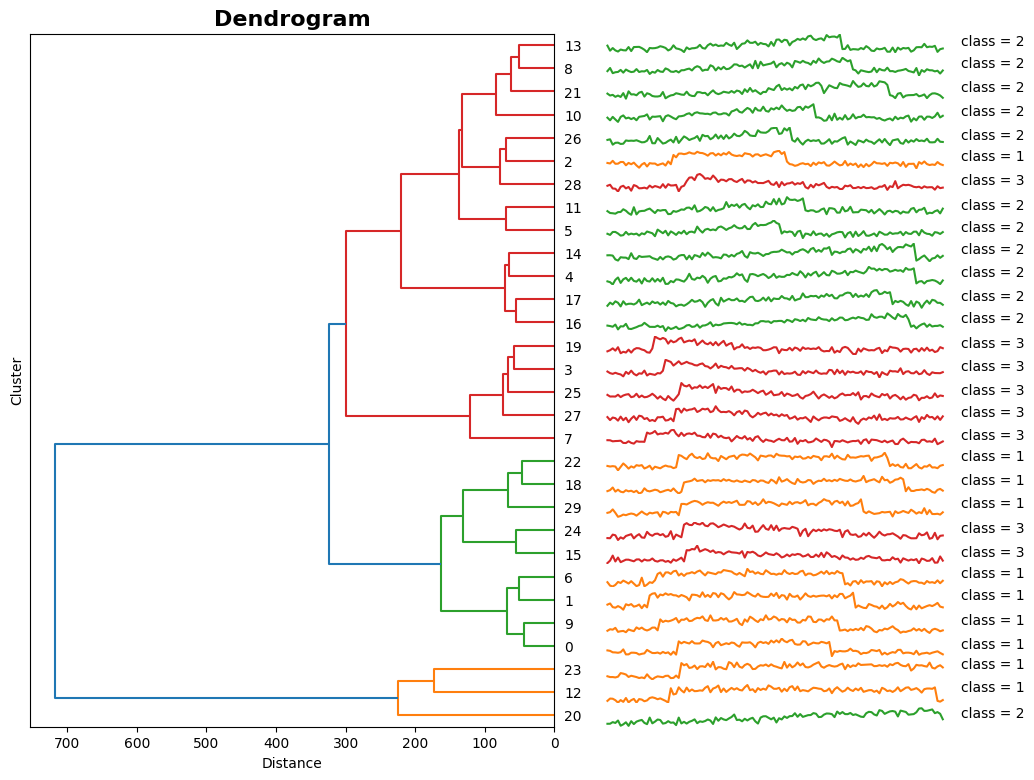

In [22]:
clust = TimeSeriesHierarchicalClustering(30)
clust_fit=clust.fit(calculate_distance_matrix(ts_set, 'dtw'))
clust_fit.plot_dendrogram(ts_set, labels)

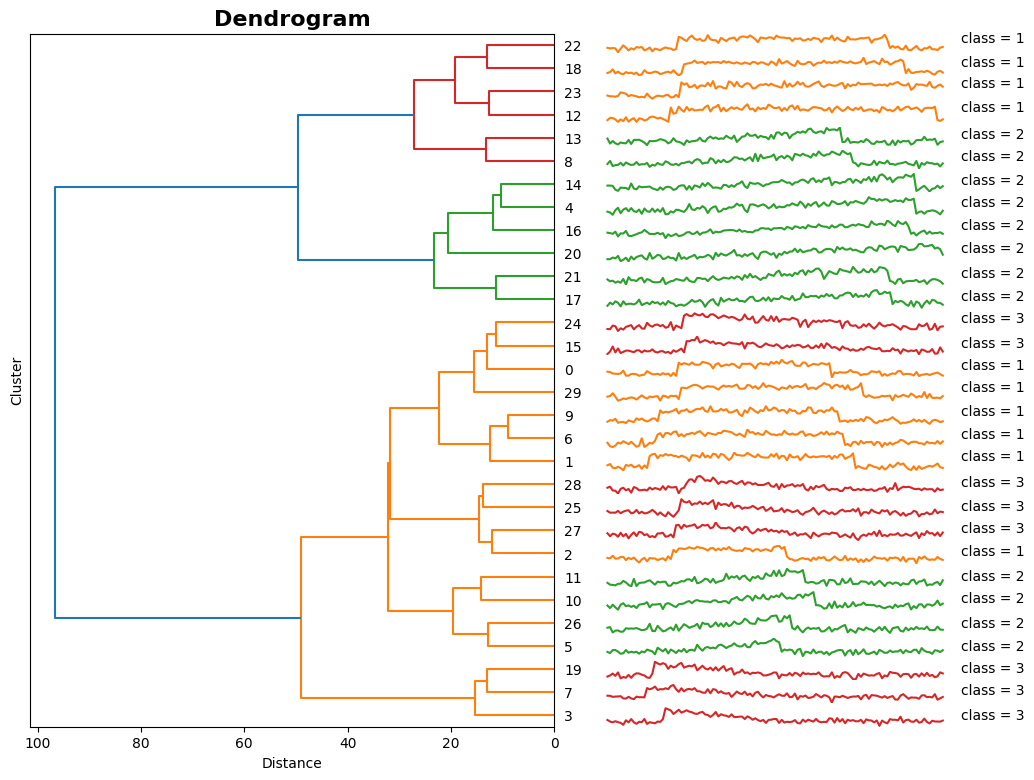

In [23]:
clust = TimeSeriesHierarchicalClustering(n_clusters=30)
clust_fit=clust.fit(calculate_distance_matrix(ts_set, 'euclidean'))
clust_fit.plot_dendrogram(ts_set, labels)

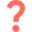
Проанализируйте полученные результаты кластеризации с помощью построенных дендрограмм. Какая на ваш взгляд метрика/мера показала лучший результат и почему? Укажите, в каких случаях более предпочтительно использовать меру DTW, чем метрику Евклида.




Мера DTW (Dynamic Time Warping) и метрика Евклида являются двумя разными способами измерения сходства между временными рядами или последовательностями данных.

Метрика Евклида является простым способом измерения расстояния между двумя точками в многомерном пространстве. Она опирается на предположение о линейности и симметричности расстояния. При этом, метрика Евклида не учитывает временной аспект данных и не учитывает возможные искажения во времени при сравнении последовательностей. Поэтому метрика Евклида будет предпочтительна в случаях, когда временной аспект не является ключевым и последовательности имеют одинаковую скорость или частоту обновления.

Мера DTW, с другой стороны, является более гибким методом сравнения временных рядов или последовательностей данных, который учитывает возможные искажения во времени между последовательностями. Она вычисляет оптимальное выравнивание между двумя последовательностями путем нахождения наименьшей суммы расстояний между соответствующими точками в двух последовательностях. Мера DTW особенно полезна, когда последовательности имеют разные скорости или внутреннюю переменную структуру.

Некоторые примеры использования меры DTW:

1. Распознавание речи: DTW используется для сравнения акустических шаблонов звуков и вычисления сходства между аудиофайлами.
2. Биомедицинская обработка сигналов: DTW может использоваться для сравнения электрокардиограмм (ЭКГ) и электроэнцефалограмм (ЭЭГ) для выявления паттернов и аномалий.
3. Распознавание жестов: DTW применяется для сравнения последовательностей движений рук при распознавании жестов.
4. Финансовая аналитика: DTW может быть использован для сравнения и анализа финансовых временных рядов, например, для прогнозирования биржевых цен.

Таким образом, если важно учитывать временную структуру данных и возможные искажения, мера DTW будет предпочтительнее метрики Евклида. В других случаях, когда временной аспект не является ключевым, метрика Евклида может быть достаточной для измерения сходства между последовательностями.